### VERİ BİLİMİ İÇİN İSTATİSTİK 201

**1. Hipotez Testleri**

Tanım: Bir inanışı(bir savı veya tahmini vs.) test etmek için kullanılan istatistiksel bir tekniktir

##### Hipotez Testi Adımları
1. **Adım1:** Hipotezlerin kurulması ve yönlerinin belirlenmesi
2. **Adım2:** Anlamlılık düzeylerinin ve tablo değerlerinin bilinmesi
3. **Adım3:** Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması
4. **Adım4:** Hesaplanan test istatistiği ile alfaya denk gelen tablo değerlerinin karşılaştırılması.
    Test istatistiği (Zh) > Tablo Değeri (Zt) ise H0 Red
5. **Adım5:** Elde edilen değerler yorumlanır

##### Tek Örneklem T Testi
Popülasyon ortalası ile varsayımsal bir değer arasında istatistiksel olarak anlamı
bir fark olup olmadığını test etmek için kullanılan parametrik bir testtir.

In [1]:
import numpy as np
import scipy.stats as stats

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 157, 145, 127, 244, 163, 114,
                     145, 65, 112, 185, 202, 146, 203, 224, 203, 114, 188, 156,187, 154, 177, 95, 165, 50,
                     110, 216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

In [2]:
# varsayımlar
# normallik varsayımı
# Shapiro-Wilks Testi
from scipy.stats import shapiro
shapiro(olcumler) # pvalue değeri 0.05 değerinden küçük olmadığı için bu durumda H0 hipotezi reddedilemez
# Sonuç: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.

ShapiroResult(statistic=0.9853103897061022, pvalue=0.7848671719373956)

In [3]:
# Tek örneklem T testi uygulaması
stats.ttest_1samp(olcumler,popmean=170)


TtestResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446, df=49)

Yukarıdaki hesaplamaya göre:
 - H0: Web sitesinde geçirilen ortalama süre 170 saniyedir.
 - H1: Web sitesinde geçirilen ortalama süre 170 saniye değildir.
pvalue değeri 0.03 < 0.05 olduğu için H0 hipotezi reddedilir, yani bu durumda H1 hipotezi geçerlidir.
Ortalama değerimiz de 154.38 olduğu için şu çıkarımı yapabiliriz ki
'Web sitesinde kullanıcıların geçirdiği ortalam süre 170 saniyeden küçüktür' diyebiliriz.

##### Nonparametrik Tek Örneklem Testi

In [4]:
from statsmodels.stats.descriptivestats import sign_test

In [5]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227217)

##### TEK ÖRNEKLEM ORAN TESTİ
 Oransal bir ifade test edilmek istenildiğinde kullanılan bir test türüdür.

In [6]:
# İş Uygulaması: Dönüşüm Oranı Testi
# gerçekleşen olay / o duruma maruz kalan kişi sayısı
# Problem: 
# Bir yazılım ile bir mecrada reklam verilmiş ve bu reklama ilişkin yazılım tarafından 0.125 dönüşün oranı elde 
# edildiği ifade edilmiştir. Fakat bu durum kontrol edilmek isteniyor. Çünkü bu yüksek bir oran ve gelirler incelendiğinde örtüşmüyor
# Detaylar: 
# 500 kişi dış mecrada reklamlara tıklamış, 40 tanesi sitemize gelip alışveriş yapmış.
# Örnek üzerinde elde edilmiş dönüşüm oranı: 40/500: 0.08
# H0: p=0.125
# H1: p!=0.125

In [7]:
from statsmodels.stats.proportion import proportions_ztest

In [8]:
count = 40
nobs = 500
value = 0.125

proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

In [9]:
# alfa 0.0002 < 0.05 olduğu için H0 hipotezi reddedilir
# Ürün satın alışına ilişkin dönüşüm oranımız 0.125 değildir. %95 oranı ile bu çıkarımı yapabiliyorz

##### BAĞIMSIZ İKİ ÖRNKELEM T TESTİ (AB TESTİ)
- Normallik varsayımı
- Varyans homojenliği varsayımı

İş Uygulaması: ML Modelinin Başarı Testi(AB Testi)
- Problem:
Bir ML projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırılıp
anlamlı bir farklılık olup olmadığı test edilmek isteniyor.

In [10]:
import pandas as pd
A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24, 23, 25,
                  27, 23, 27, 23, 25, 21, 18, 24, 26, 33, 26, 27, 28, 19, 25],
                columns=['gelir']) 
B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 38, 28, 37, 37, 30,
     32, 31, 31, 27, 32, 33, 33, 33, 31, 32, 33, 26, 32, 33, 29],
                columns=['gelir'])

A['GRUP'] = 'A'
B['GRUP'] = 'B'

AB = pd.concat([A,B])

AB = AB.reset_index(drop=True)

AB.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
gelir,30,27,21,27,29,30,20,20,27,32,...,33,33,33,31,32,33,26,32,33,29
GRUP,A,A,A,A,A,A,A,A,A,A,...,B,B,B,B,B,B,B,B,B,B


<Axes: xlabel='GRUP', ylabel='gelir'>

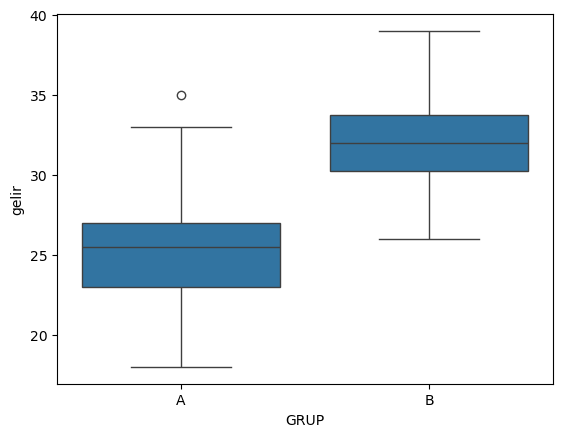

In [11]:
import seaborn as sns
sns.boxplot(x="GRUP", y="gelir",data=AB)